In [1]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ft2font
from matplotlib.cm import get_cmap
from matplotlib.colors import LinearSegmentedColormap
import itertools
from itertools import zip_longest
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse import dok_matrix
from scipy.sparse import block_diag
from scipy.sparse.linalg import eigsh
import scipy.linalg as la
import os
import Hamiltonian_definition as HD

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
save_path = "/home/costanza/UNIVERSITÀ/secondo semestre/MOLTI CORPI/dati/"

## Lattice definition

In [3]:
Lx, Ly = 4,4 # lattice dim
L=Lx*Ly
dim=2**(Lx*Ly)

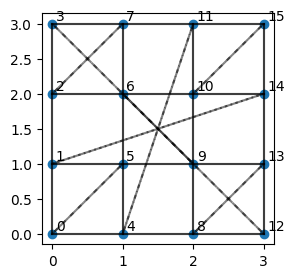

0 --> Nearest neighbors: [4, 3]  -- Next neighbor: [5]
1 --> Nearest neighbors: [5, 0]  -- Next neighbor: [14]
2 --> Nearest neighbors: [6, 1]  -- Next neighbor: [7]
3 --> Nearest neighbors: [7, 2]  -- Next neighbor: [12]
4 --> Nearest neighbors: [8, 7]  -- Next neighbor: [11]
5 --> Nearest neighbors: [9, 4]  -- Next neighbor: [0]
6 --> Nearest neighbors: [10, 5]  -- Next neighbor: [9]
7 --> Nearest neighbors: [11, 6]  -- Next neighbor: [2]
8 --> Nearest neighbors: [12, 11]  -- Next neighbor: [13]
9 --> Nearest neighbors: [13, 8]  -- Next neighbor: [6]
10 --> Nearest neighbors: [14, 9]  -- Next neighbor: [15]
11 --> Nearest neighbors: [15, 10]  -- Next neighbor: [4]
12 --> Nearest neighbors: [0, 15]  -- Next neighbor: [3]
13 --> Nearest neighbors: [1, 12]  -- Next neighbor: [8]
14 --> Nearest neighbors: [2, 13]  -- Next neighbor: [1]
15 --> Nearest neighbors: [3, 14]  -- Next neighbor: [10]


In [4]:
coor = HD.generate_lattice(Lx,Ly)
neighbors_indices = HD.index_nn(coor,Lx,Ly)
diag_indices = HD.index_nnn(coor,Lx,Ly)

HD.plot_lattice(coor,neighbors_indices,diag_indices)

## Chancing J1 J2

In [ ]:

"""
N=9
HN = HD.build_HN(Lx,Ly,N,J1,J2,neighbors_indices,diag_indices)
HN = HN.toarray()

eigvals, eigvecs = la.eigh(HN)
print(eigvals[0])"
"""


### Diagonalization

In [5]:
#angles = [(2*i-1)*np.pi/16 for i in range(6)]
#theta = angles[1:-1]
print(theta)



[0.39269908169872414]
9
10
11
12
13
14
15
16


In [ ]:
%%time
for i in range(len(theta)):
    print("-------------------------------")
    print(i, f"theta={theta[i]}")
    J1=np.sin(theta[i])
    J2=np.cos(theta[i])
    
    folder_name = f"J1={round(J1,2)}_J2={round(J2,2)}/"
    full_path = save_path + folder_name
    os.makedirs(full_path, exist_ok=True)

    HN = []
    for N in range(Lx*Ly+1):
        print(f'N={N}')
        HN.append(HD.build_HN(Lx,Ly,N,J1,J2,neighbors_indices,diag_indices))
        print(HN[N].shape)

        HN_dict = {}
        HN_dict[f'HN_{N}'] = HN[N].toarray()

        eigvals, eigvecs = la.eigh(HN_dict[f'HN_{N}'])
        print(f"finito di diagonalizzare HN_{N} alle", datetime.now())
        print("")
        
        folder_eig = f"eigvals block N={N}/"
        path = full_path + folder_eig
        os.makedirs(path, exist_ok=True)
        np.save(path+f"eigvals_N={N}", eigvals)
        np.save(path+f"eigvecs_N={N}", eigvecs)

-------------------------------
0 theta=0.39269908169872414
N=9
build_HN finito


IndexError: list index out of range

### Eigen values

#### J1=0, J2=1

/tmp/ipykernel_15157/2254583894.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


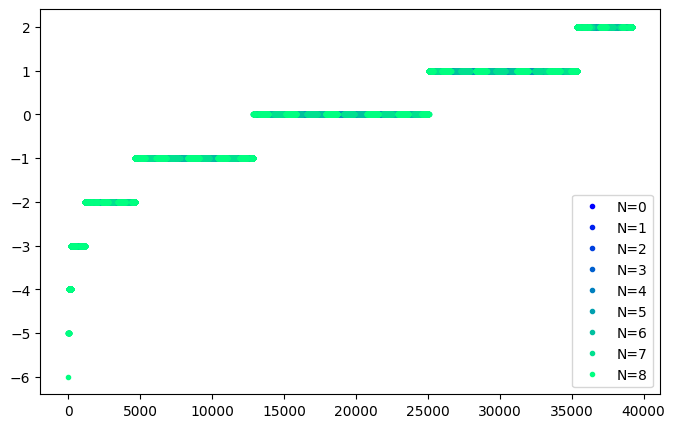

In [23]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 9))

all_eigvals = []
all_labels = []
for i in range(9):
    a=np.load(save_path+"J1=0.0_J2=1.0/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

for i in range(9):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")

plt.legend()
plt.show()

eigvals_0_1 = all_eigvals_sorted
labels_0_1 = all_labels_sorted

0
1
2
3
4
5
6
7
8


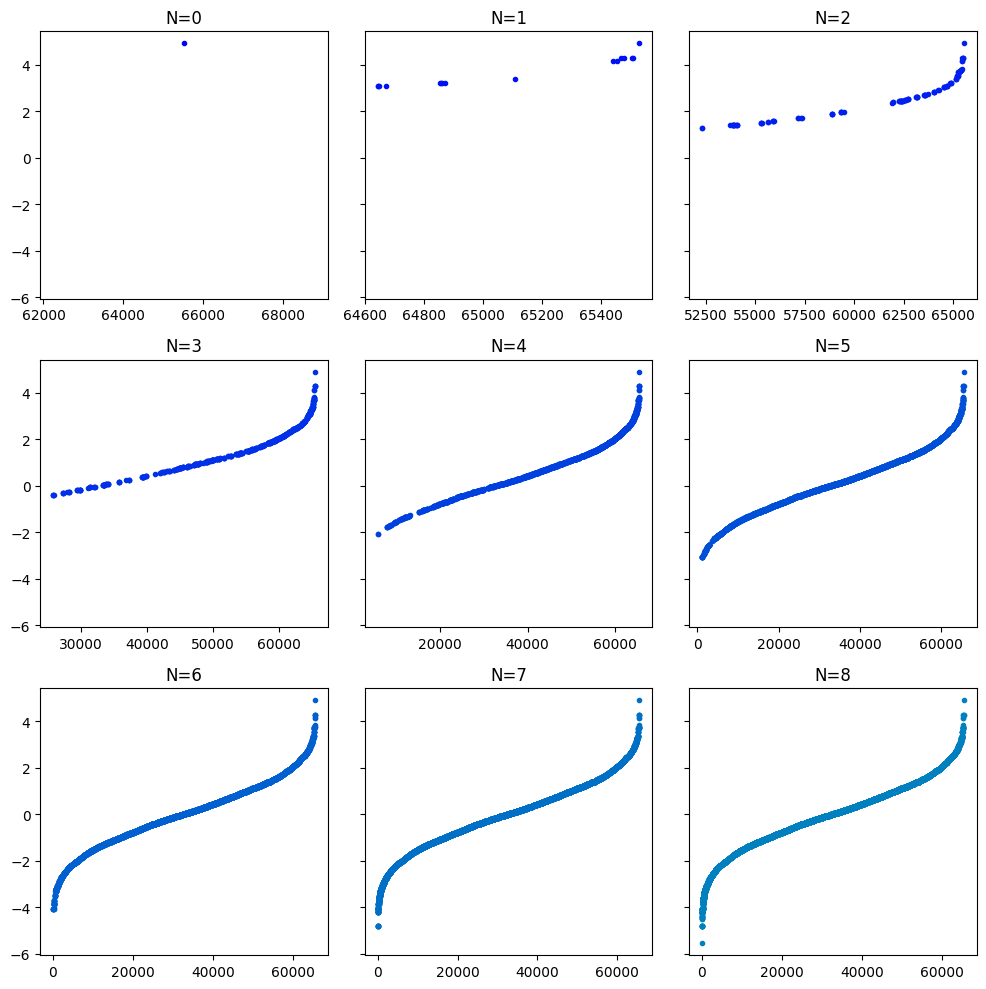

In [ ]:

fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)

for i, ax in enumerate(axes.flatten()):
    mask = all_labels_sorted == i
    ax.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i])
    ax.set_title(f"N={i}")
plt.tight_layout()
plt.show()

#### J1=1, J2=0

/tmp/ipykernel_15157/3255430011.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


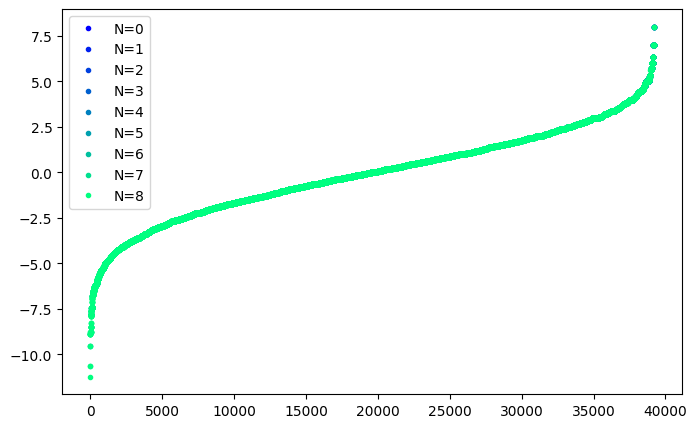

-11.228483208428862


In [22]:
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 9))

all_eigvals = []
all_labels = []
for i in range(9):
    a=np.load(save_path+"J1=1.0_J2=0.0/"+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
    all_eigvals.extend(a)
    all_labels.extend([i]*len(a)) 

all_eigvals = np.array(all_eigvals)
all_labels = np.array(all_labels)
sorted_indices = np.argsort(all_eigvals)
all_eigvals_sorted = all_eigvals[sorted_indices]
all_labels_sorted = all_labels[sorted_indices]

for i in range(9):
    mask = all_labels_sorted == i
    plt.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")

plt.legend()
plt.show()
print(all_eigvals_sorted[0])

eigvals_1_0 = all_eigvals_sorted
labels_1_0 = all_labels_sorted

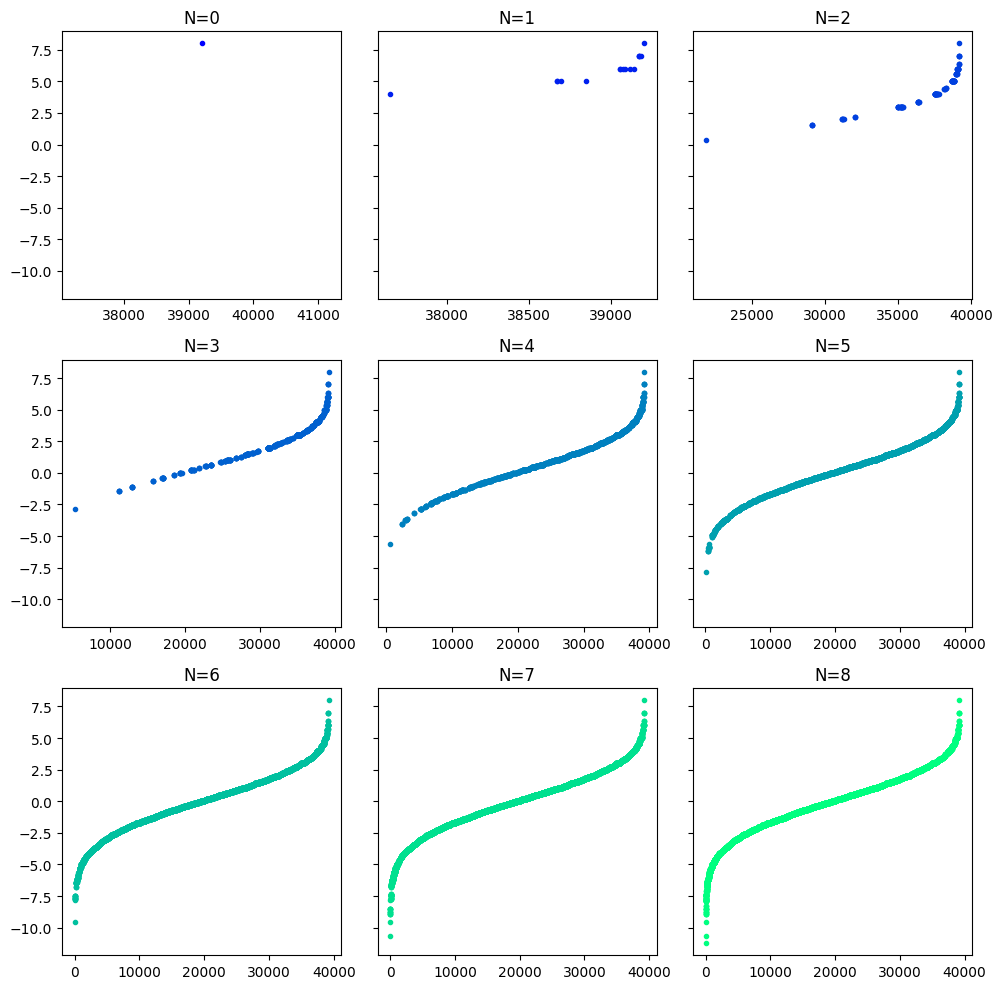

In [9]:
fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)

for i, ax in enumerate(axes.flatten()):
    mask = all_labels_sorted == i
    ax.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i])
    ax.set_title(f"N={i}")
plt.tight_layout()
plt.show()

#### Other values of J1 and J2

/tmp/ipykernel_19416/2373707043.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


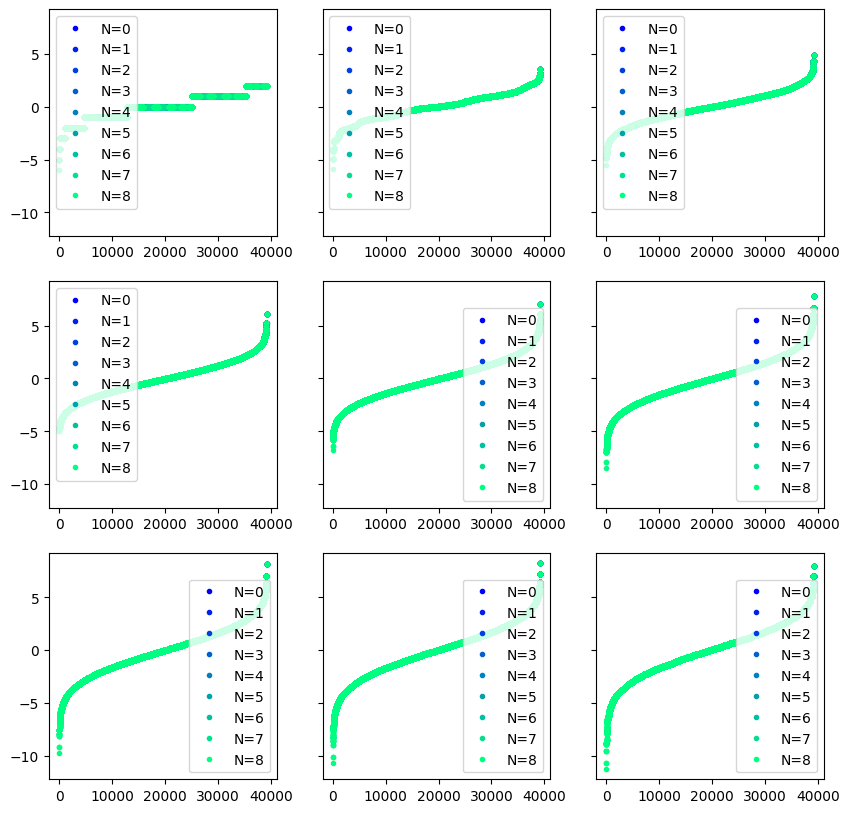

In [10]:
folder = ["J1=0.0_J2=1.0/", "J1=0.2_J2=0.98/","J1=0.38_J2=0.92/","J1=0.56_J2=0.83/", "J1=0.71_J2=0.71/", "J1=0.83_J2=0.56/", "J1=0.92_J2=0.38/", "J1=0.98_J2=0.2/", "J1=1.0_J2=0.0/"]
all_theta = [i*np.pi/16 for i in range(9)]

eigvals_dict = {}
labels_dict = {}

fig, axes = plt.subplots(3,3, figsize=(10, 10), sharey=True)
for F, ax in enumerate(axes.flatten()):
    

    colormap = get_cmap("winter")
    colors = colormap(np.linspace(0, 1, 9))

    all_eigvals = []
    all_labels = []
    for i in range(9):
        a=np.load(save_path+folder[F]+f"eigvals block N={i}/"+f"eigvals_N={i}.npy")
        all_eigvals.extend(a)
        all_labels.extend([i]*len(a)) 

    all_eigvals = np.array(all_eigvals)
    all_labels = np.array(all_labels)
    sorted_indices = np.argsort(all_eigvals)
    all_eigvals_sorted = all_eigvals[sorted_indices]
    all_labels_sorted = all_labels[sorted_indices]

    for i in range(9):
        mask = all_labels_sorted == i
        ax.plot(np.where(mask)[0], all_eigvals_sorted[mask], '.', color=colors[i], label=f"N={i}")

    ax.legend()

    eigvals_dict[f'all_theta_{F}'] = all_eigvals_sorted
    labels_dict[f'all_theta_{F}'] = all_labels_sorted

plt.show()

/tmp/ipykernel_19416/1192349796.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap("winter")


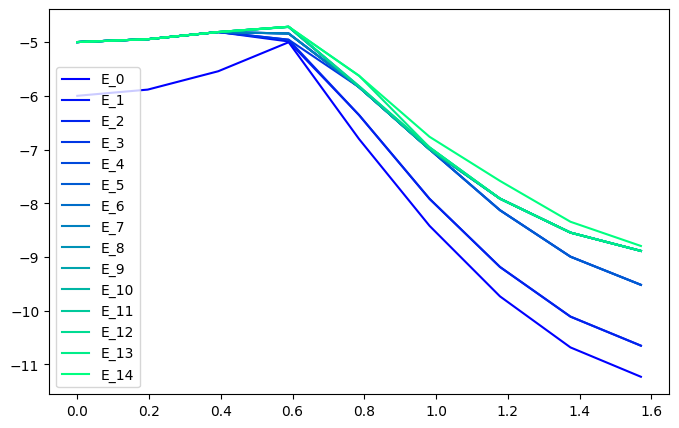

In [12]:
number = 15
plt.figure(figsize=(8,5))
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, number))
for j in range(number):
    energy = [eigvals_dict[f'all_theta_{i}'][j] for i in range(len(all_theta))]
    plt.plot(all_theta, energy, label=f'E_{j}',color=colors[j])
    plt.legend()

#plt.xlim(0.4,0.8)
#plt.ylim(-6,-4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


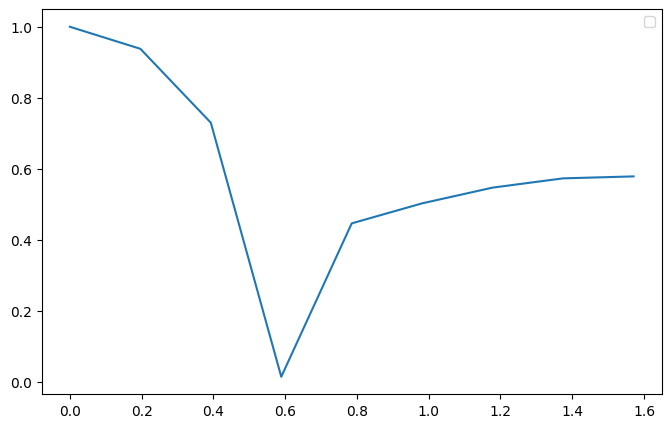

In [55]:

plt.figure(figsize=(8,5))
GS = [eigvals_dict[f'all_theta_{i}'][0] for i in range(len(all_theta))]
E1 = [eigvals_dict[f'all_theta_{i}'][1] for i in range(len(all_theta))]
plt.plot(all_theta, np.array(E1)-np.array(GS))
plt.legend()